#            Implementation of Image Web Scraping using Selenium Python

# Step1. Import all required libraries

In [19]:
#Import libraries
import os
import selenium
from selenium import webdriver
import time
from PIL import Image
import io
import requests
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import ElementClickInterceptedException

# Step2. Install Chrome Driver

In [20]:
#Install Driver
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Current google-chrome version is 84.0.4147
[WDM] - Get LATEST driver version for 84.0.4147


[WDM] - Driver [C:\Users\panwla\.wdm\drivers\chromedriver\win32\84.0.4147.30\chromedriver.exe] found in cache


# Step3. Specify Search url

In [21]:
#Specify Search URL
search_url = "https://www.google.com/search?q={q}&tbm=isch&tbs=sur%3Afc&hl=en&ved=0CAIQpwVqFwoTCKCa1c6s4-oCFQAAAAAdAAAAABAC&biw=1251&bih=568"
driver.get(search_url.format(q='Car'))

 - I've used this specific URL so you don't get in trouble for using licensed or images with copyrights. Otherwise you can use https://google.com also as search URL .
 - Then we're searching for Car in our Search URL.

### Paste the link into to driver.get(“ Your Link Here ”) function and run the cell. This will open a new browser window for that link. 
### You should get window something like below-

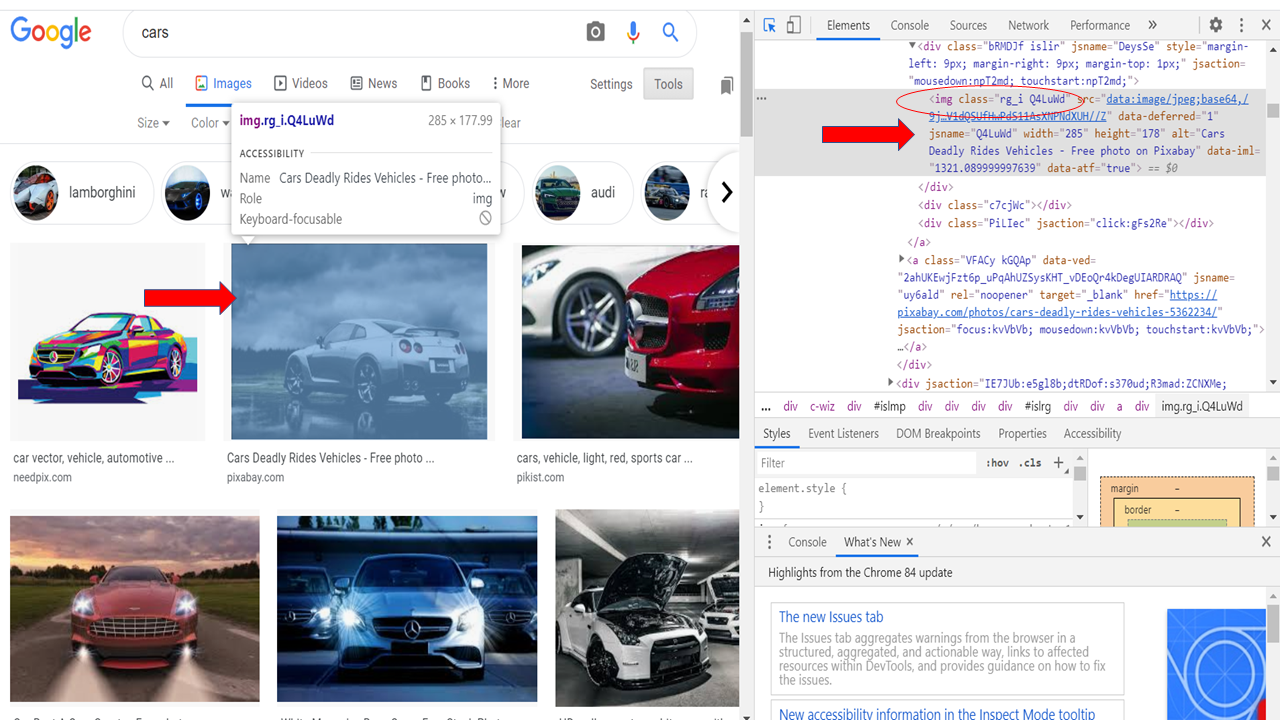

# Step4. Scroll to the end of the page

In [22]:
#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions  


#### The above line of code would help us to reach the end of the page . And then we're giving sleep time of 5 seconds so we don't run in problem , where we're trying to read elements from page , which is not yet loaded.

# Step5. Locate the images to be scraped from the page

In [23]:
#Locate the images to be scraped from the current page
imgResults = driver.find_elements_by_xpath("//img[contains(@class,'Q4LuWd')]")
totalResults=len(imgResults)

In [28]:
totalResults

100

### Now we'll fetch all the image links present on that particular page. We will create a “list” to store those links.
So, to do that go to the browser window, right-click on the page, and select ‘inspect element’ or enable the dev tools using Ctrl+Shift+I .
Now identify any attribute such as class , id etc. Which is common across all these images.

In our case class ="'Q4LuWd" is common across all these images. 


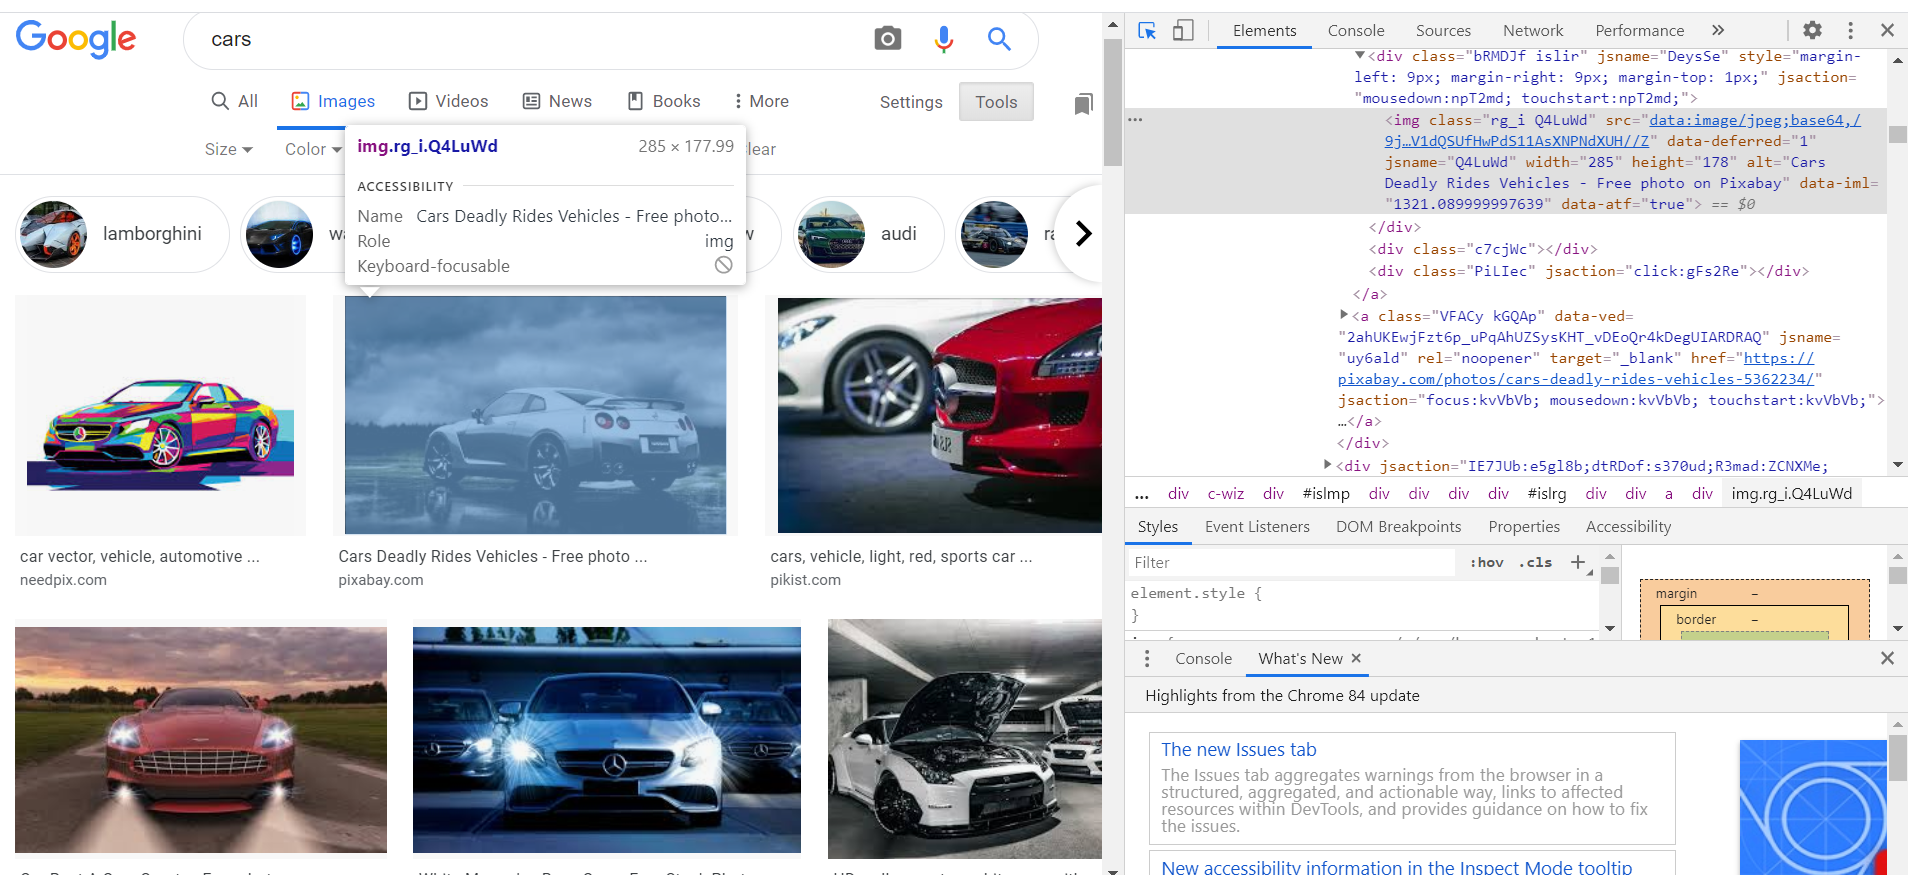

# Step6. Extract corresponding link of each Image

In [30]:
#Click on each Image to extract its corresponding link to download

img_urls = set()
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

Message: element click intercepted: Element <img class="rg_i Q4LuWd" data-src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSepzlJ9-2sry4WY2kfFtCHXw_W3NwsqA0dJg&amp;usqp=CAU" data-lt="" jsname="Q4LuWd" width="225" height="225" alt="Black car profile image | Public domain vectors" src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSepzlJ9-2sry4WY2kfFtCHXw_W3NwsqA0dJg&amp;usqp=CAU"> is not clickable at point (135, 480). Other element would receive the click: <div jsname="r5xl4" class="islrc" style="width: 551px;">...</div>
  (Session info: chrome=84.0.4147.89)

Message: element click intercepted: Element <img class="rg_i Q4LuWd" data-src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR1VKiy0pIwwQtZ-O4k70WxJUNXqYb-xUpAvg&amp;usqp=CAU" data-lt="" jsname="Q4LuWd" width="225" height="225" alt="Red car burning tires | Public domain vectors" src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR1VKiy0pIwwQtZ-O4k70WxJUNXqYb-xUpAvg&amp;usqp=CAU"> is not cli


So in the above snippet of code , we're performing following tasks
   - Iterate through each thumbnail and then on click it .
   - Make our browser sleep for 2 seconds (:P) .
   - Find the unique html tag corresponding to that image to locate it on page
   - We still get more than one result for particular image .  But all we're interested in the link for that image to download.

So we iterate through each result for that image and extract 'src' attribute of it and then see whether "https" is present in the 'src'  or not. Since typically web link starts with 'https'.

# Step7. Download & save each image in Destination directory

In [33]:
os.chdir('C:/Qurantine/Blog/WebScrapping/Dataset1')
baseDir=os.getcwd()

for i, url in enumerate(img_urls):
    file_name = f"{i:150}.jpg"    
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

SAVED - https://p0.pikist.com/photos/355/614/car-old-car-street-city-travel-wallpaper.jpg - AT: C:\Qurantine\Blog\WebScrapping\Data\                                                                                                                                                     0.jpg
SAVED - https://cdn.pixabay.com/photo/2020/01/28/20/28/car-4800932_960_720.png - AT: C:\Qurantine\Blog\WebScrapping\Data\                                                                                                                                                     1.jpg
SAVED - https://upload.wikimedia.org/wikipedia/commons/e/e4/Car_crash_2.jpg - AT: C:\Qurantine\Blog\WebScrapping\Data\                                                                                                                                                     2.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRr3OeUWJGHuhlfUWY2dlBCWTbs6hzoJTAZMw&usqp=CAU - AT: C:\Qurantine\Blog\WebScrapping\Data\            

#### Now finally you have extracted the image for your project 😀

## Note:- Once you have written proper code then the browser is not important you can collect data without browser, Which is called headless browser window, hence replace the following code with the previous one.

#                  Headless chrome browser 

In [ ]:
#Headless chrome browser
from selenium import webdriver 
opts = webdriver.ChromeOptions()
opts.headless =True
driver =webdriver.Chrome(ChromeDriverManager().install())


### In this case browser will not run in background which is very helpful.